# Herman Dávid Tamás
# Farkasok és bárányok populációmodell <img src="wolfsheep/pics/wolf.png"> <img src="wolfsheep/pics/fsheep.png">

## Előszó

A "Farkasok és bárányok" egy NetLogoban készült ágens alapú modell saját programozású mesa implementációja, illetve továbbfejlesztése.
Ez a modell egy ragadozófaj és annak egy prédájának populációinak együttélését modellezi háromféleképpen.
Az alapértelmezett modelltípus a saját bővítéseimet tartalmazza, míg a másik kettő az eredeti modell két típusát hivatott a lehető leghűbben implementálni.

## A modelltípusok működési jellemzői

### Közös jellemzők

Mindhárom modellben van két állatfaj, egy ragadozó és annak egy prédája, amelyeket farkasokkal és bárányokkal reprezentálunk.
Ezek az állatok egy füves területen élnek, ahol a bárányok legelik a füvet, a farkasok megeszik a bárányokat.
Továbbá minden egyednek van valamennyi energiája (továbbiakban energiapont), amely minden lépésben (a modell állapotváltozása) eggyel csökken, de evés által a megadott paraméternyivel megnő. Ha elfogy az energiájuk (nem 0, hanem kevesebb, mint 0 energiapont), akkor meghalnak. Ezek mellett képesek is szaporodni valószínűségi alapon, azonban ekkor az energiájuk megfeleződik. A modell egy lépésében az állat ágensek egy szomszédos cellába lépnek át, ahol a szomszédos cellák a Moore-féle szomszédokat jelenti az ágens aktuális cellájának kivételével, tehát az állat ágensek nem maradhatnak egy helyben.

Az eredeti modellben a fű mint "patchek" voltak a cellákba helyezve, míg ebben az implementációban ágensként. Mindhárom modell esetén annyi fű ágens van ahány cella. A fű ágenseknek két állapota van, a kinőtt és a lelegelt.

Új paraméterek, amely mindhárom modellnél működnek:

<ul>
<li>A farkasok aktívan vadásszanak-e.</li>
<li>A vadászatot korlátozó kitevő. Lásd lejjebb.</li>
<li>A bárányok nyájba igyekezzenek-e szerveződni.</li>
<li>A random függvényeket szabályzó seed. A seed segítségével reprodukálhatóvá válnak a futtattások, de kikapcsolható.</li>
</ul>

A vadászatot korlátozó kitevő azt jelenti, hogy annak a valószínűsége, hogy egy farkas aktívan vadászik $\text{energiapont}^{-|\text{kitevő}|}$. Tehát, ha a kitevő 0, akkor nincs korlátozás. Fontos megjegyezni, hogy a kitevő azért nem pozitív, mert különben a kód működéséből kifolyólag a valószínűség 100% lenne, mint 0 esetében. Szabad vadászat esetén jellemző a túlvadászat, ez volt a kitevő bevezetésének motivációja.

### Farkasok és bárányok

<ul>
<li>A legegyszerűbb modelltípus, amely az eredeti modellből lett közvetlenül implementálva.</li>
<li>Minden cellában a fű mindig ki van nőve.</li>
<li>A bárányoknak végtelen energiájuk van (nem változik).</li>
<li>A farkasok megadott valószínűséggel esznek meg egy bárányt abból a cellából amelyen ők is vannak.</li>
<li>Az egyedek megadott valószínűséggel hoznak világra egy utódot, amely utód az egyik szomszédos cellába kerül.</li>
</ul>

### Farkasok, bárányok és fű

<ul>
<li>Szintén az eredeti modellből implementálva.</li>
<li>A fentiek érvényesek az alábbiak mellett.</li>
<li>A bárányok energiája ugyanúgy változik, mint a farkasoké.</li>
<li>A lelegelt fű ágensek megadott számú lépés után nőnek ki újra.</li>
</ul>

### Bővített modell

<ul>
<li>Az általam bővített modelltípus.</li>
<li>Az állat ágenseknek van neme.</li>
<li>A szaporodáshoz a valószínűség mellett két különböző nemű egyed kell legyen egy közös cellában és mindkét szűlőnek "akarnia" kell.</li>
<li>Az új szaporodási feltételek miatt egy szülő szaporodási valószínűsége a paraméter gyöke, így a két szülő együtt adja ki a paramétert.</li>
</ul>

## Megfigyelések

A megfigyelések leírása előtt rögzíteném a kiindulási paramétereket, amelyeket nagyrészt az eredeti modellből választottam, de az energiapontszerzést és a farkasok szaporodási rátáját növeltem a stabbilitás érdekében.
Az életteret reprezentáló rács szélei össze vannak kötve egymással azaz, ha egy állat például egy felső szélen lévő cellából felfelé lép, akkor az alsó szélen lyukad ki.
A farkasok kezdeti száma 50, a bárányoké 100. A farkasok egy bárány megevésével 30 energiapontot szereznek (eredetileg 20-at), míg a bárányok egy cellányi fűből szintén 20 energiapontot nyernek (eredetileg 4-et).
A farkasok 10 (eredetileg 5), a bárányok 4% valószínűséggel szaporodnak. A lelegelt fű 30 lépésenként nő vissza. A farkasok aktívan vadásznak, a bárányok nyájba igyekeznek szerveződni.
A vadászatot korlátozó kitevő $-0,5$, a seed 474.

A modell elemzés szempontjából legérdekesebb tulajdonsága a stabilitása, vagyis milyen paraméterek mellett nem halnak ki az állatok, illetve nem szaporodnak túl.

Először egy az eredeti modell esetében is stabil beállításról beszélnék, arról, amikor a farkasok, bárányok és fű modellben a farkasok kezdeti számát nullára állítjuk. Ha a modellem minden paraméterét alapértelmezetten hagyunk kivéve a farkasok kezdeti számát, akkor is stabil modellt kapunk, szép nagy nyájakkal. Ha azonban a bárányok fűből nyert energiapontmennyiségét visszaállítjuk 4-re, akkor a bárányok párokba szerveződnek és könnyen előfordulhat, hogy a populáció egyneművé válik, tehát a modell így nem stabil. A párokba szerveződésnek az áll a hátterében, hogy, ha egy báránynak 0 energiapontja van, akkor a mozgásuk nem korlátozott (bármely szomszédos cellába léphetnek, ez az alapértelmezett viselkedés is) a túlélés valószínűségének növelése érdekében. A nemek bevezetésének következtében megnehezült szaporodást kompenzálni kell, amit a születéskor kapott maximális energiapontmennyiség megnövelésével értem el.

## A vizualizációs program

### Futattás

A modell vizualizációjáért a mesa_viz_tornado python csomag felelős (a Python tehát előfeltétele a futtatásnak), ami a mesa 2.4.0 verziójának telepítésekor automatikusan települ, azonban az ennél újabb verziók (3.0.0+) már nem használják, ezért a kompatibilitás érdekében közvetlenül importáltam a belőle szükséges elemeket.

A vizualizációs programot többféleképpen is el lehet indítani. Egyik lehetőség az ezen notebookkal egy mappában lévő run.py fálj futtatása, vagy a mappában megnyitott parancsorba azt írjuk be, hogy "mesa runserver" idézjelek nélkül.

Sajnálatos módon, csak Linux alatt ajánlott a futtatás, mert valamilyen ok folytán Windows alatt a mesa_viz_tornado által generált weboldalon nem jelennek meg rendesen az interaktív elemek, de ettől függetlenül minden működik. Azonban WSL-lel vagy virtuális géppel Windowson is hibátlanul futattható. Mindkét módszert Debian Linuxszal teszteltem. Én a WSL megoldást javaslom, mert a kiírt IP-címes URL működik (http://127.0.0.1:8521, amivel egyenértékű a <a href=http://localhost:8521>localhost:8521</a>) a virtuális gép esetével ellentétben, ahol a programtól és annak beállításaitól függ az IP-cím, vagy a virtuális gépen belül használjuk a programot.

### Kezelés

<img src="wolfsheep/pics/viz_showcase.png" width=700>

A fenti ábrán egy az alapértelmezett paraméterekkel, kezdeti állapotban készült képernyőkép látható.

A weboldal alapértelmezett nyelve az angol, de a jobb felső sarokban lévő zászlóra kattintva a grafikonok jelmagyarázatának kivételével átállítható magyarra és akár vissza is. A bal felső sarokban a model neve látható, mellette a Leírás gombra kattintva a README.md egy rövidített, csak az oldal aktuális nyelvén lévő változata olvasható. A zászlótól balra látható az Indítás, a Léptetés és a Visszaállítás gombok, amelyek nevükhöz hűen működnek, de az Indítás gomb a Megállítás gombbá változik, ha fut a szimuláció.

A bal oldalon a modell paraméterei állíthatók be, középen a modellt vizualizáló négyzetrács látható, amely felett a rendes, Indítás gombbal való indított szimuláció sebessége allítható, amely alapértelmezett értéke 3 lépés/másodperc, azonban ez az ágensek számától függően változhat (például túlszaporodás esetén lassabb). A rács alatt két grafikon látható (az alsó nem fért a képre), amely közül a felső az egyedek számát ábrázolja fajonként, illetve nemenként a lépésszám függvényében. Az alsó grafikon a kinőtt fűágensek százalékos arányát ábrázolja szintén a lépésszám függvényében. A lejjebb lévő "Vizualizáció nélküli futtattás" szakaszban ugyanezen grafikonok láthatóak.

A nőstény farkasok narancssárgák, a hímek szürkék, a nőstény bárányok fehérek, a hímek feketék. Ennek a választásnak a következménye az, hogy az öröklött modelltípusokban minden farkas hím és minden bárány nőstény.

## Vizualizáció nélküli futtattás

Az alábbi cella futtattásával a modell alapértelmezett paramétereivel 100 lépés szimulálható és az adatokat egy pontosvesszővel elválasztott csv fájlba írható, amelyben tizedesvessző van, nem tizedespont. Igény szerint ez a df.to_csv sep és decimal paraméterrével megváltoztatható, illetve az első paraméter a fájlnév. A lépésszám a range(100)-ban a 100 átállításával változtatható meg. Én az 5000 vagy 10000 lépésszámot ajánlom, de ilyenkor a futtattás hosszabb időbe telik.

(11, 7)

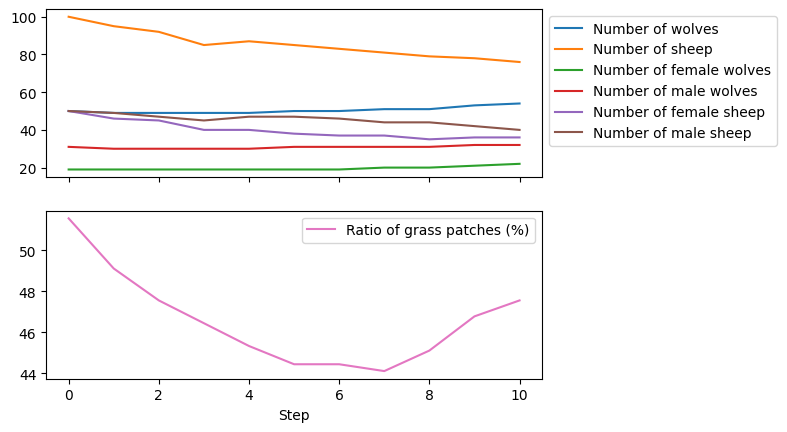

In [3]:
from wolfsheep import WolfSheepModel


model = WolfSheepModel(30, 30, False, "Extended model", 50, 100, 30, 20, 45, 4, 30, True, True, -0.5, False, 474)
for i in range(10):
    model.step()
df = model.datacollector.get_model_vars_dataframe()
df.index.name = "Step"
ax1, ax2 = df.plot(subplots=[tuple(df.columns[:-1])], sharex=True)
ax1.legend(bbox_to_anchor=(1, 1))
ax2.legend(bbox_to_anchor=(1, 1))
df.to_csv("data.csv", sep=";", decimal=",")
df.to_numpy().shape

False, "Extended model", 50, 100, 30, 20, 45, 4, 30, True, True, -0.5, False, 474, 20000 lépés 876-tól 1 nőstény farkas

## Hivatkozások

<ul>
<li>Wilensky, U. (1997). NetLogo Wolf Sheep Predation model. http://ccl.northwestern.edu/netlogo/models/WolfSheepPredation. Center for Connected Learning and Computer-Based Modeling, Northwestern University, Evanston, IL.</li>
<li><a href=https://upload.wikimedia.org/wikipedia/commons/c/c1/Flag_of_Hungary.svg>https://upload.wikimedia.org/wikipedia/commons/c/c1/Flag_of_Hungary.svg</a></li>
<li><a href=https://upload.wikimedia.org/wikipedia/commons/a/a5/Flag_of_the_United_Kingdom_(1-2).svg>https://upload.wikimedia.org/wikipedia/commons/c/c1/Flag_of_Hungary.svg</a></li>
<li><a href=https://mesa.readthedocs.io/stable/tutorials/visualization_tutorial.html>https://mesa.readthedocs.io/stable/tutorials/visualization_tutorial.html</a> (dead/halott link)</li>
<li><a href=https://stackoverflow.com/questions/66624802/javascript-start-function-when-innertext-changes>https://stackoverflow.com/questions/66624802/javascript-start-function-when-innertext-changes</a></li>
</ul>